In [1]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data
from wordcloud import WordCloud

In [2]:
#Read the S&P 500 from the wikipedia page
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]

#Save the S&P 500 symbols in a csv
#df.to_csv("SP500Symbols.csv", columns=['Symbol'])

In [7]:
#Read the S&P 500 symbols
sp = pd.read_csv('SP500Symbols.csv', index_col=[0])

In [9]:
# getCompanyInfo returns a dictionary with the company symbol as a key and the info as the value 
# call to iex finance api to return company info for a list of symbols
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token="************")
    company_info = stock_batch.get_company()
    return company_info

In [10]:
#Download the tickers in batches of 50
sp_company_info = getCompanyInfo(sp["Symbol"][450:].tolist())

In [12]:
#Turn company info into a list
company_info_to_df = []
for company in sp_company_info:
    company_info_to_df.append(sp_company_info[company])

In [15]:
#Turn list into a dataframe
columns = ['symbol', 'companyName', 'exchange',
           'industry', 'website', 'CEO', 'sector']
df = pd.DataFrame(company_info_to_df, columns=columns )
df.head()

,symbol,companyName,exchange,industry,website,CEO,sector
0,TRV,"The Travelers Cos., Inc.",New York Stock Exchange,Multi-Line Insurance,http://www.travelers.com,Alan D. Schnitzer,Finance
1,TFC,Truist Financial Corp.,New York Stock Exchange,Regional Banks,http://www.thepremierfinancialinstitution.com,Kelly S. King,Finance
2,TWTR,"Twitter, Inc.",New York Stock Exchange,Internet Software/Services,http://www.twitter.com,Jack Dorsey,Technology Services
3,TSN,"Tyson Foods, Inc.",New York Stock Exchange,Food: Meat/Fish/Dairy,http://www.tysonfoods.com,Noel W. White,Consumer Non-Durables
4,UDR,"UDR, Inc.",New York Stock Exchange,Real Estate Investment Trusts,http://www.udr.com,Thomas W. Toomey,Finance


In [130]:
#Write the batch to a CSV
#df.to_csv("SP_450_500.csv")

In [19]:
#Read each of the batches
"""
df1 = pd.read_csv("SP_1_50.csv")
df2 = pd.read_csv("SP_50_100.csv")
df3 = pd.read_csv("SP_100_150.csv")
df4 = pd.read_csv("SP_150_250.csv")
df5 = pd.read_csv("SP_250_350.csv")
df6 = pd.read_csv("SP_350_450.csv")
df7 = pd.read_csv("SP_450_500.csv")
"""

In [20]:
#Combine all the batches into one df
"""
dfCom = pd.concat([df1,df2],axis=0)
dfCom = pd.concat([dfCom,df3],axis=0)
dfCom = pd.concat([dfCom,df4],axis=0)
dfCom = pd.concat([dfCom,df5],axis=0)
dfCom = pd.concat([dfCom,df6],axis=0)
dfCom = pd.concat([dfCom,df7],axis=0)
"""

In [21]:
#dfCom.to_csv("SP_1_505.csv")

In [27]:
dfCom = pd.read_csv("SP_1_505.csv")

In [28]:
#Get the first name of each CEO and put in a column called 'firstName'
dfCom['firstName'] = dfCom['CEO'].str.split().str[0].str.strip()

In [29]:
#Get rid of weird characters
dfCom['firstName'] = dfCom['firstName'].str.replace(r"[\"\',]", '')

In [30]:
#List top 11 most common names
dfCom.groupby(['firstName']).count().sort_values(['companyName'], ascending=False)["companyName"].head(11)

firstName
Michael    22
David      21
James      21
John       19
Thomas     15
William    14
Jeffrey    13
Robert     12
Richard    11
Steven      9
Mark        8
Name: companyName, dtype: int64

In [31]:
#Turn coolumn of first names into a word cloud
names = dfCom['firstName'].values
names = str(names).replace("'","")
names = names.replace("\n","")
names = names.replace("'[","")
wordcloud = WordCloud(width=800, height=400).generate(names)

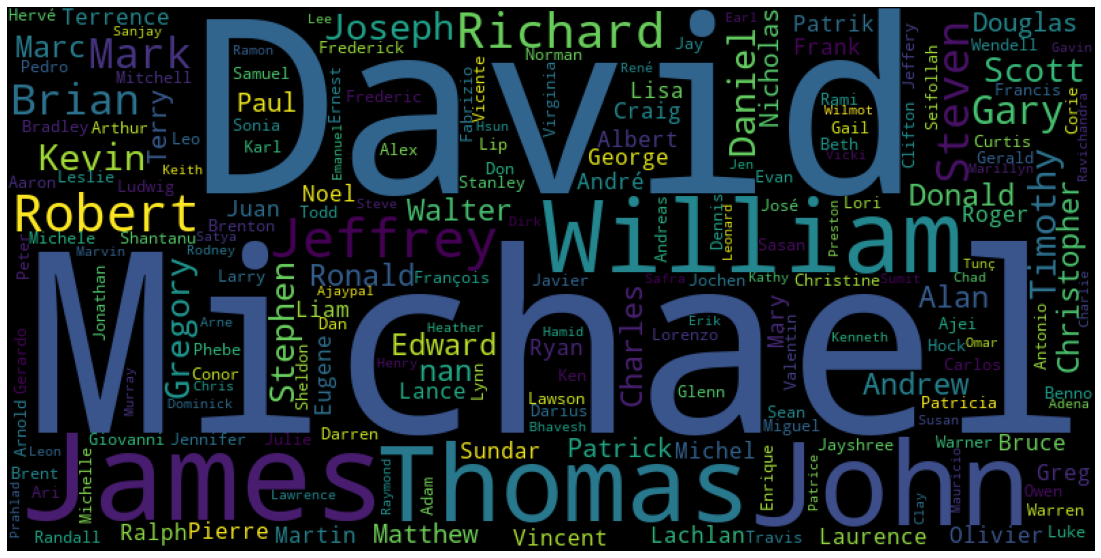

In [32]:
#Plot the word cloud 
fig, ax = plt.subplots(figsize=(25, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('CEONamesWordCloud.png',bbox_inches = 'tight',pad_inches = 0)